## sbs24018 - Machine Learning - CA1

##### For my project, I have chosen the area of "Education" and will use the "Student Performance Dataset" dataset found at https://www.kaggle.com/datasets/devansodariya/student-performance-data



In [1]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Here I import all the needed libraries, classes and modules that I use throughout the notebook. 
# As i progress and need to import anything in the later code cells, I return here and add it to this cell so everything is loaded from the beginning. 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm


In [3]:
# Load the dataset
stu_data = pd.read_csv('student_data.csv')

In [4]:
# Display the first 10 rows of the dataset.
stu_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [5]:
# Display dataset info.
stu_data.info()

      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# Describe dataset numerical column data.
stu_data.describe()



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


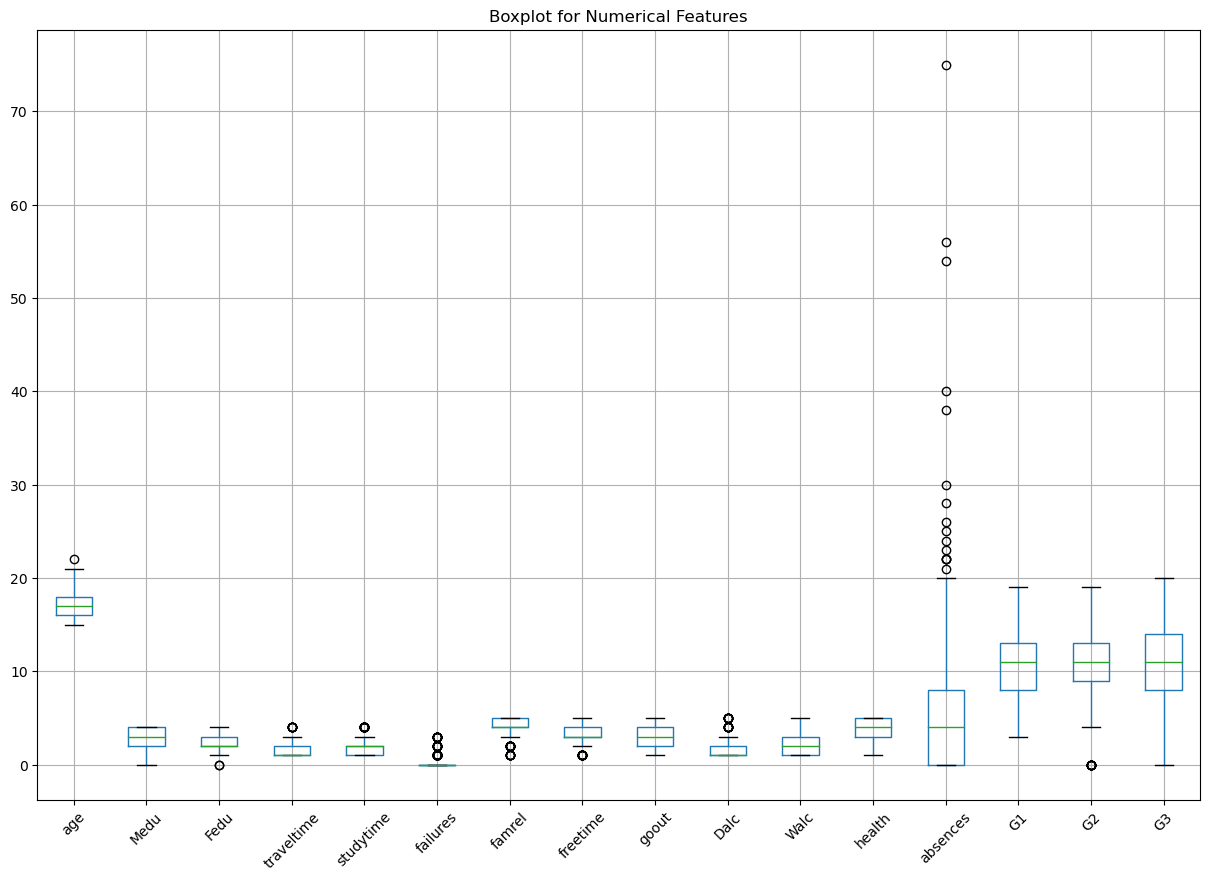

In [7]:
# Here I create a Boxplot of the numerical columns in order to identify early if there are any outliers (Individual Dots) in the data.  
plt.figure(figsize=(15, 10))
stu_data.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot for Numerical Features')
plt.show()



In [8]:
# Checking null values for all columns.
null_values = stu_data.isnull().sum()
null_values


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# Identify the numeric and categorical columns in the dataset:
numeric_cols = stu_data.select_dtypes(include=[np.number]) 
#print(numeric_cols)

# Identify all categorical columns in the stu_data
categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)

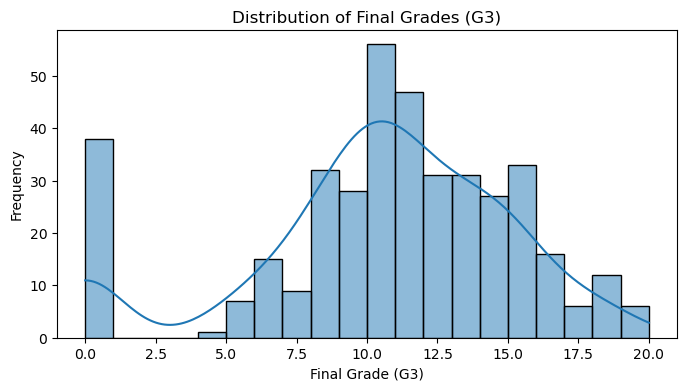

In [10]:
# Here I want to visualize the distribution of G3 final exam grades by histogram using matplotlib and seaborn libraries.
# G3 final grade is my focus for this project. 
plt.figure(figsize=(8, 4))
sns.histplot(numeric_cols['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

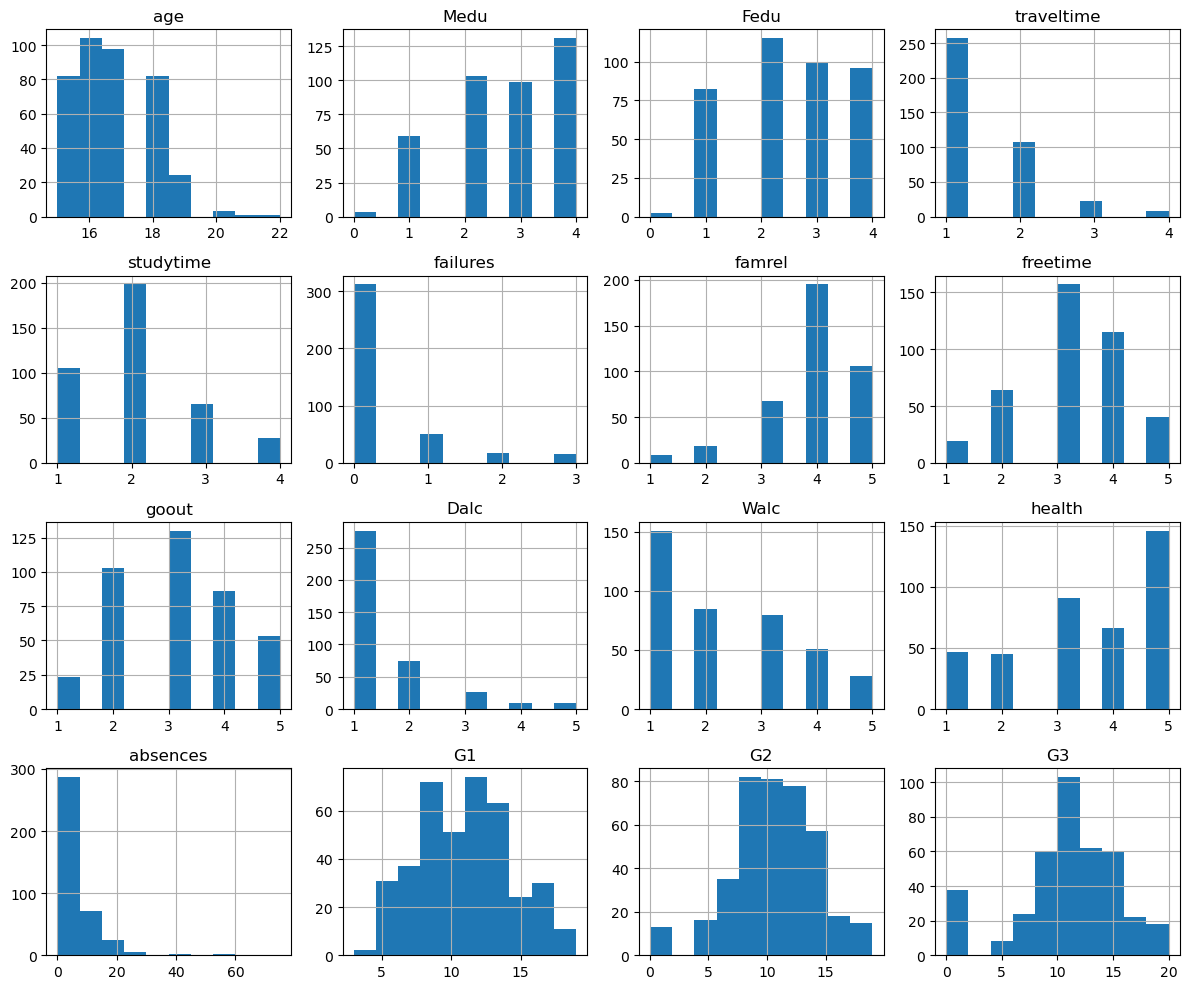

In [11]:
# I also want to create histograms to see the distribution of each numerical feature in the dataframe. 
stu_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

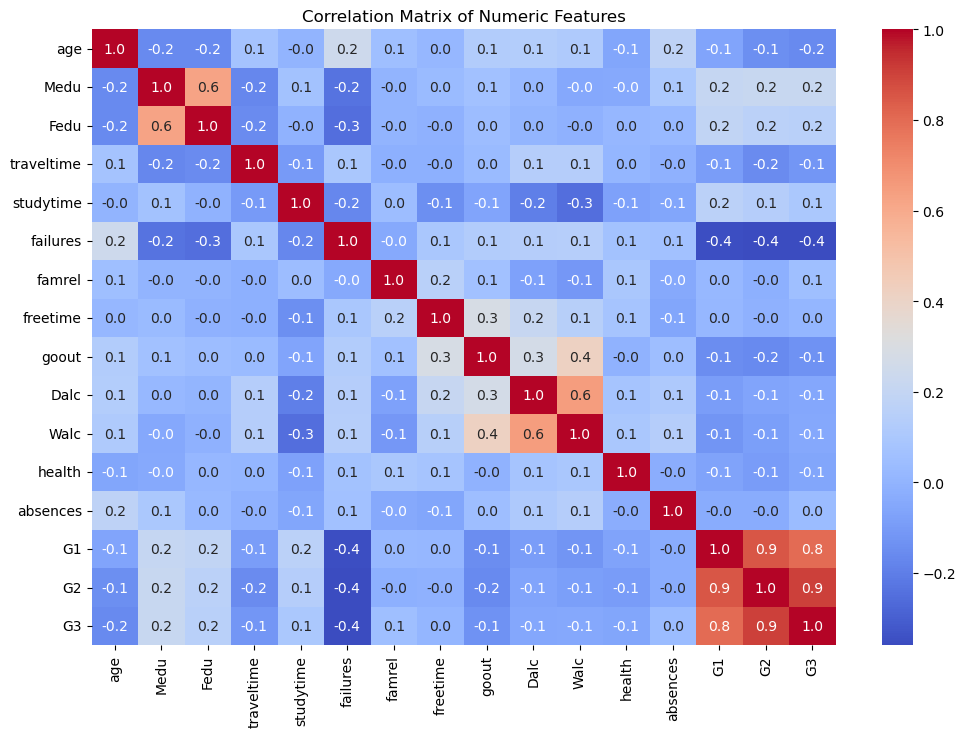

In [12]:
# Here I calculate and plot the correlation matrix as a heatmap in order to easily identify the correlation between two features  
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

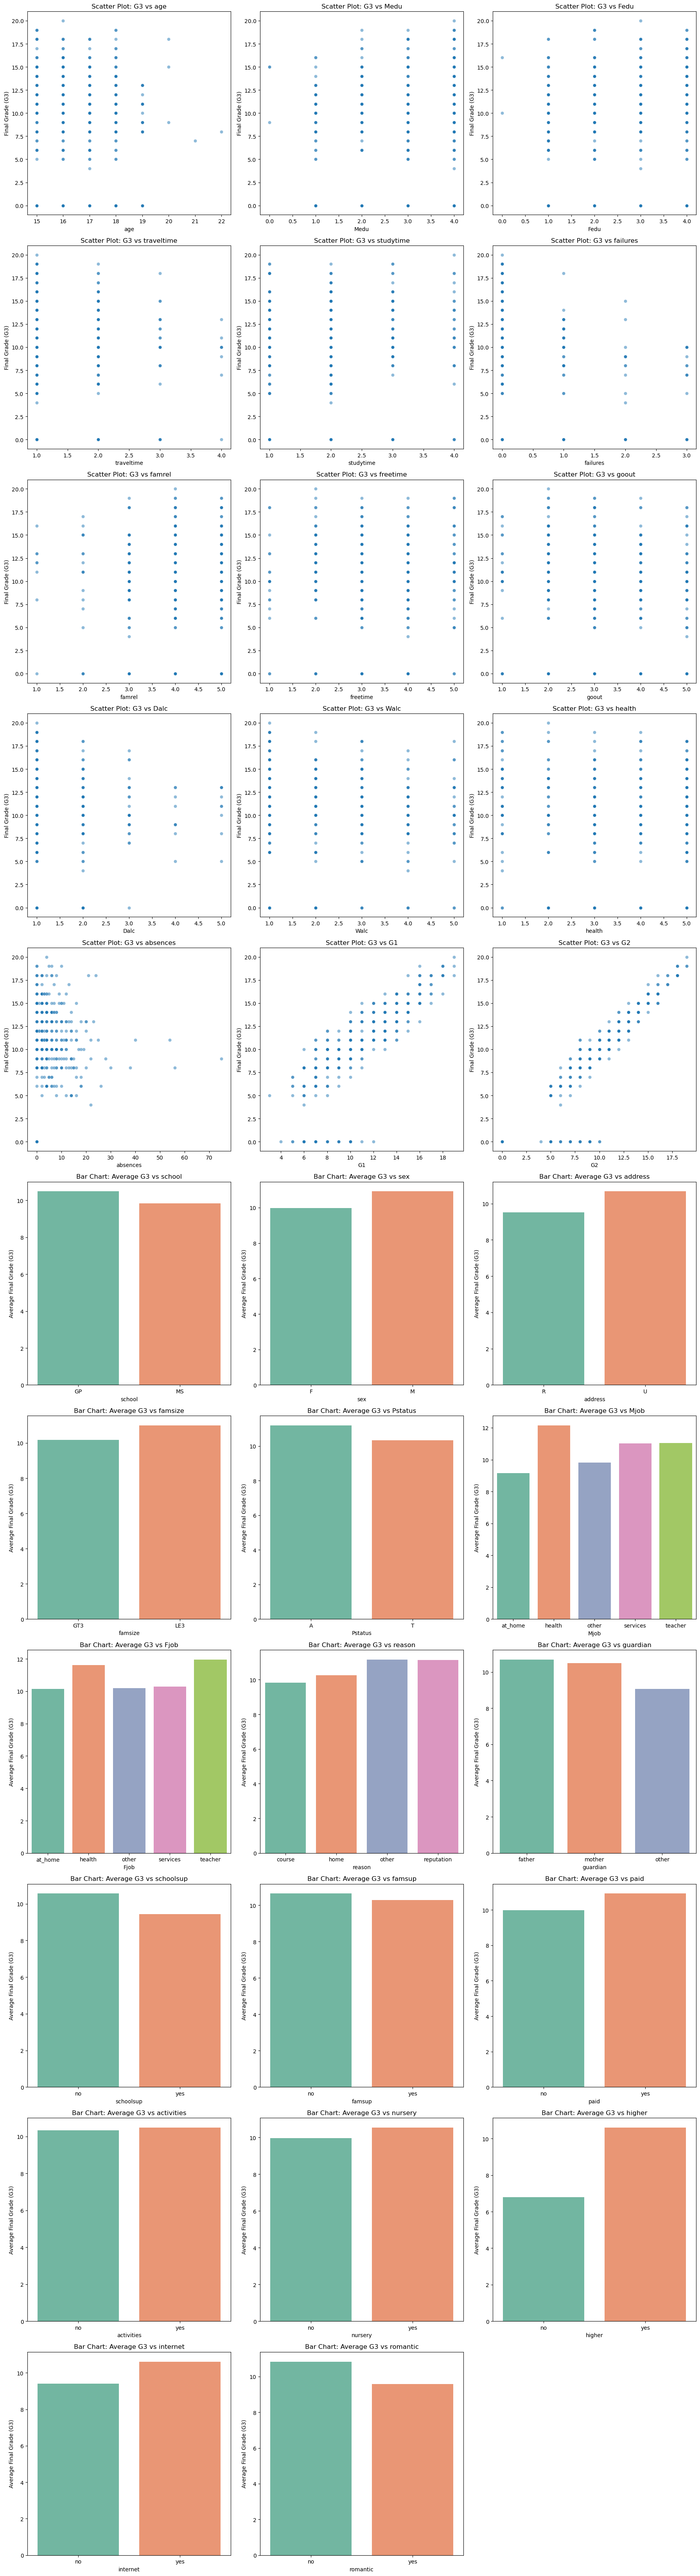

In [13]:
# In the code section, I try to perform a thorough exploratory data analysis by creating visual relationships between each feature and the target variable, G3. 
# This will hopefully allow for an investigation into potential linear relationships or category-wise differences in the dataset.

# Identify numeric and categorical columns, excluding 'G3' from numeric if present
numeric_cols = numeric_cols.columns.tolist()
if 'G3' in numeric_cols:
    numeric_cols.remove('G3')

# Setting the plotting area and dimensions
num_plots = len(numeric_cols) + len(categorical_cols)
total_rows = num_plots // 3 + (num_plots % 3 > 0)

fig, axes = plt.subplots(nrows=total_rows, ncols=3, figsize=(18, 6 * total_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plotting numeric features with scatter plots
for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=stu_data[col], y=stu_data['G3'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot: G3 vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Final Grade (G3)')

# Plotting categorical features with bar charts
for j, col in enumerate(categorical_cols):
    # Calculate the mean of G3 for each category and plot
    category_means = stu_data.groupby(col)['G3'].mean().reset_index()
    sns.barplot(x=col, y='G3', data=category_means, ax=axes[len(numeric_cols) + j], palette='Set2')
    axes[len(numeric_cols) + j].set_title(f'Bar Chart: Average G3 vs {col}')
    axes[len(numeric_cols) + j].set_xlabel(col)
    axes[len(numeric_cols) + j].set_ylabel('Average Final Grade (G3)')


# Adjust layout and remove unused subplots if any
for ax in axes[len(numeric_cols) + len(categorical_cols):]:
    ax.remove()
plt.tight_layout()
plt.show()

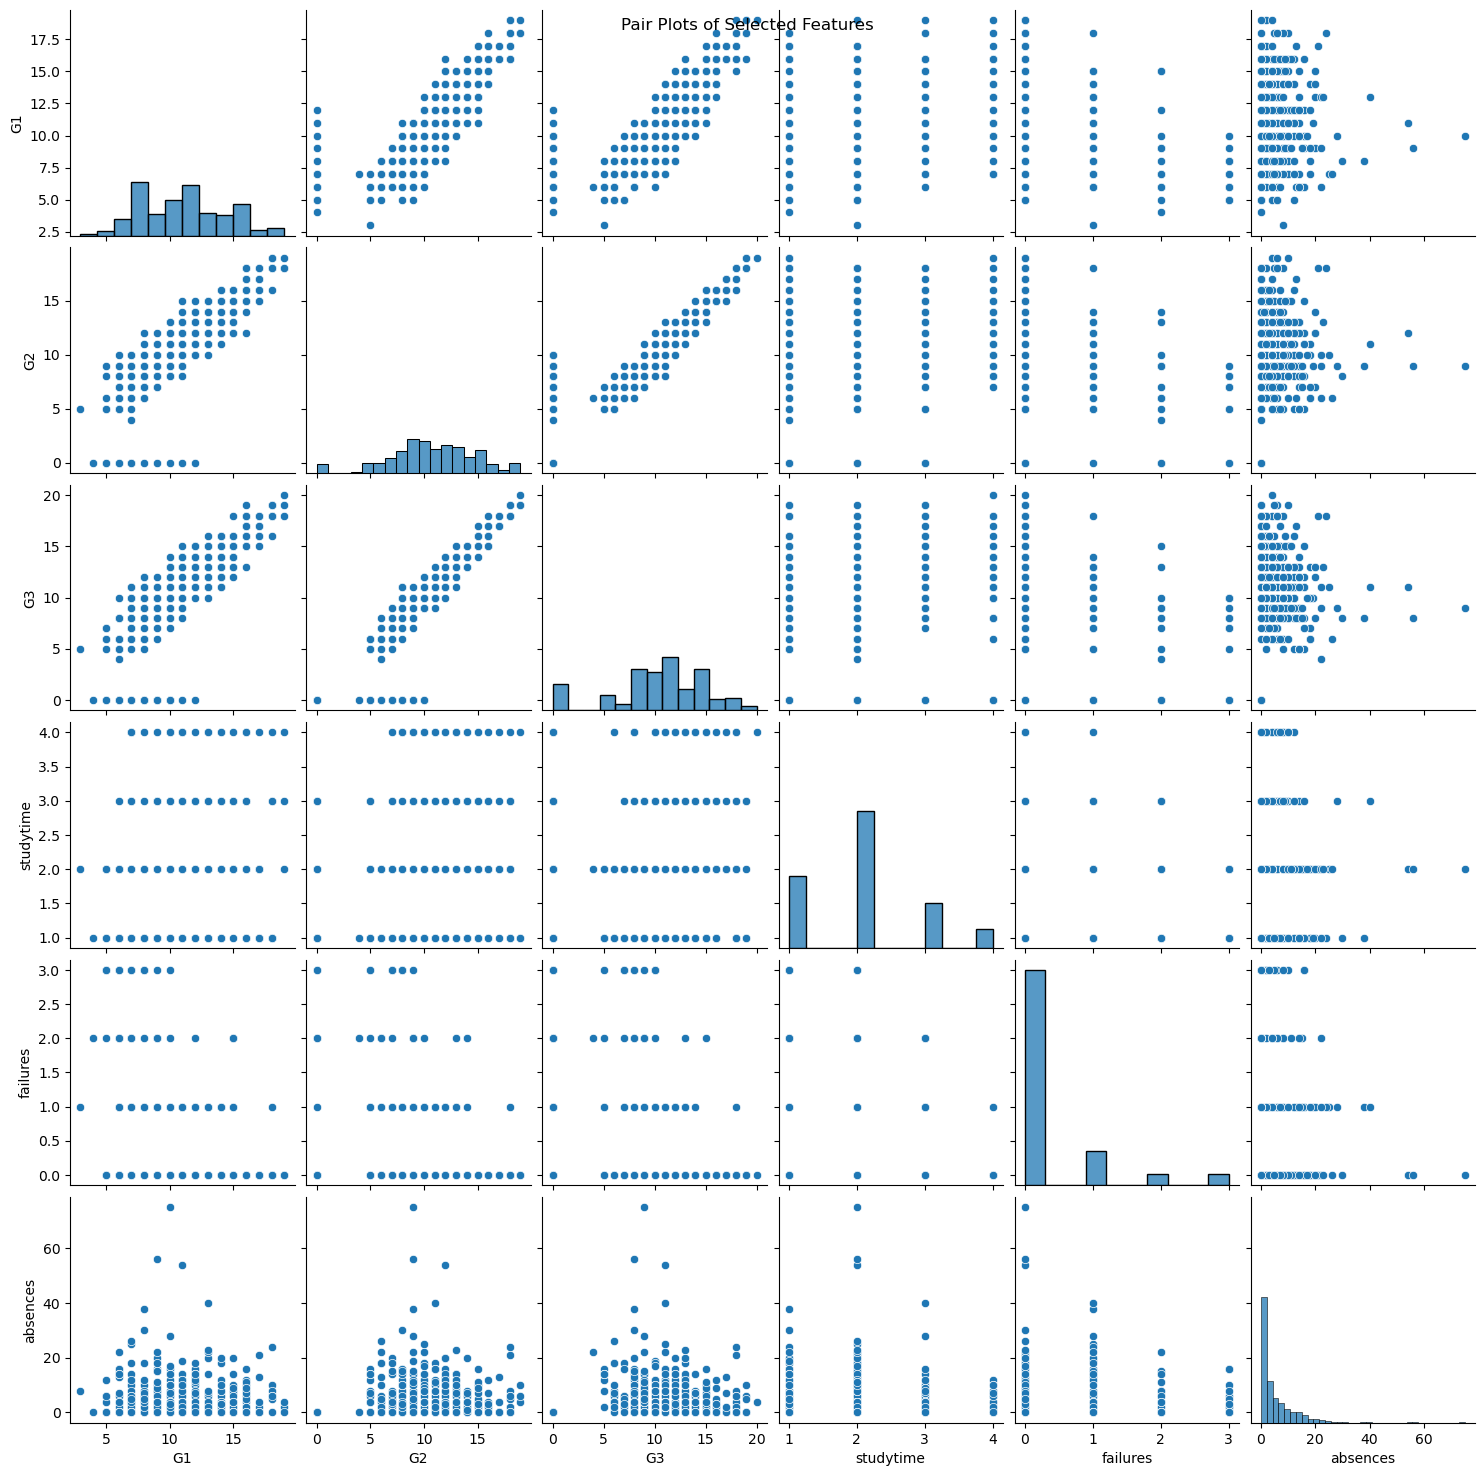

In [14]:
# Creating pair plots for a subset of the main features. 
subset_features = ['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']
sns.pairplot(stu_data[subset_features])
plt.suptitle('Pair Plots of Selected Features')
plt.show()

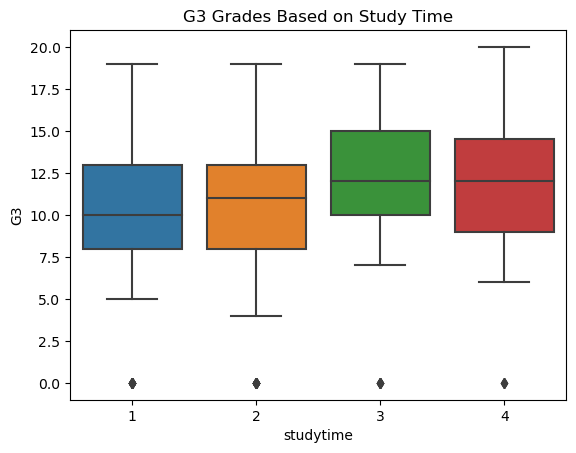

In [15]:
# Here I create Box plots to compare distributions of grades based on study time. 
# Intuition and common sense would say that there should be a correlation between study time and grade performance. 
# Maybe not in this case. 

sns.boxplot(x='studytime', y='G3', data=stu_data)
plt.title('G3 Grades Based on Study Time')
plt.show()

In [16]:
# Encoding Categorical variables into numerical variables using One hot encoding
one_hot_encoded_data = pd.get_dummies(stu_data, columns=categorical_cols, drop_first=True) # Drop first because I was getting duplicate colums with inverted data
one_hot_encoded_data = one_hot_encoded_data * 1  # This converts True to 1 and False to 0


# Display the first 10 rows of the dataset.
one_hot_encoded_data.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,1,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,1,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,1,1,1,1,1,0


In [17]:
# Here I am comparing the numerical & categorical pre and post One hot encoding  

numeric_cols = stu_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols)
numeric_cols_v2 = one_hot_encoded_data.select_dtypes(include=[np.number]).columns.tolist() 
#print(numeric_cols, "\n")

categorical_cols = stu_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols)
categorical_cols_v2 = one_hot_encoded_data.select_dtypes(include=['object']).columns.tolist()
#print(categorical_cols, "\n")

# Print all columns after encoding
all_cols_v2 = one_hot_encoded_data.columns.tolist()
print(all_cols_v2)


['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


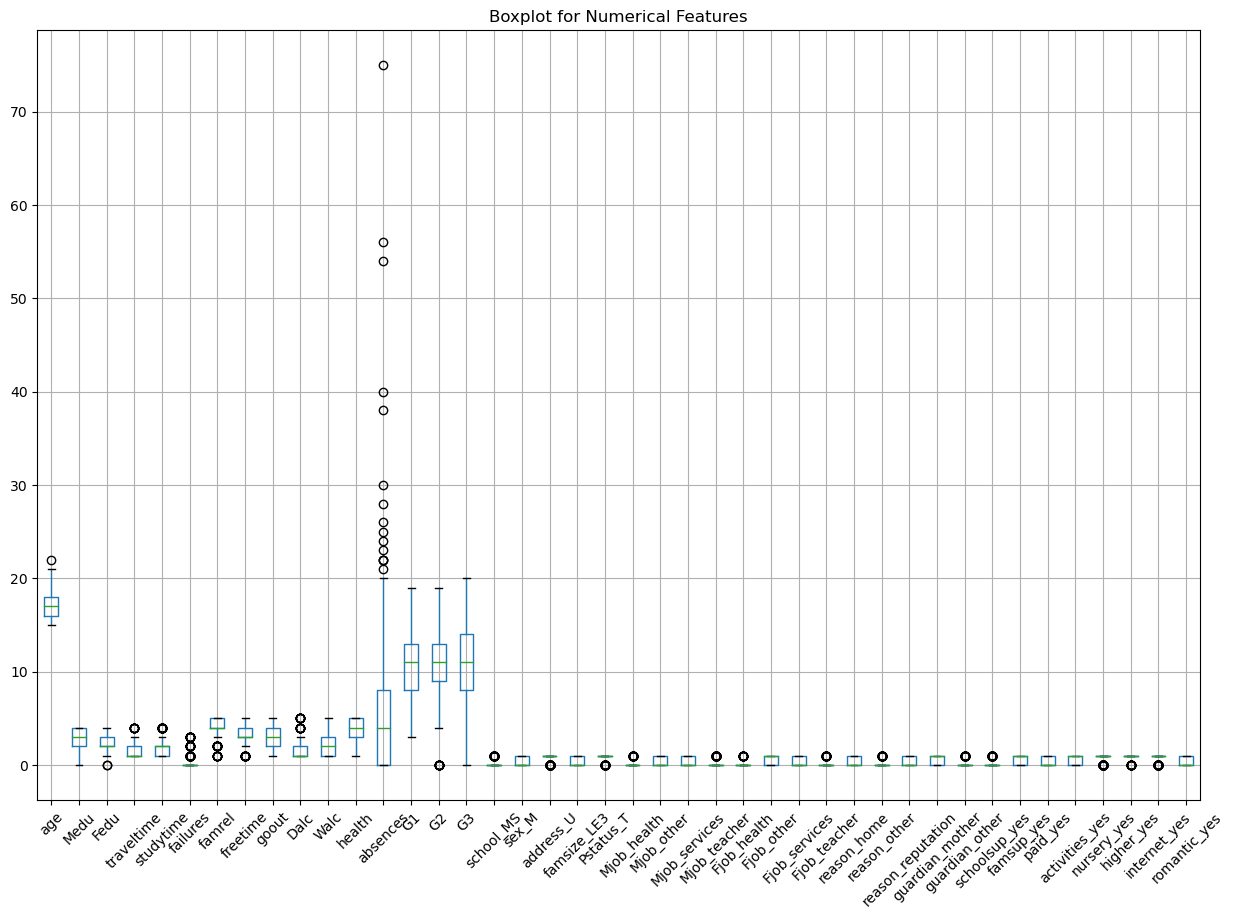

In [18]:
# Plotting boxplots for numerical features after encoding to identify any new outliers
plt.figure(figsize=(15, 10))
one_hot_encoded_data.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot for Numerical Features')
plt.show()

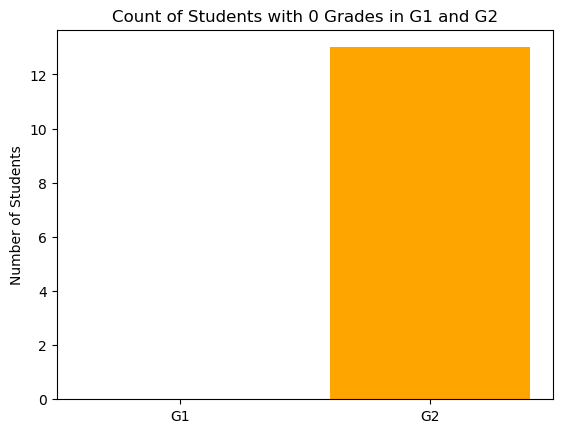

In [19]:
# Calculate the number of students with 0 scores in G1 and G2
g1_zeros = (stu_data['G1'] == 0).sum()
g2_zeros = (stu_data['G2'] == 0).sum()

# Create a bar plot to display the count of 0 scores
plt.bar(['G1', 'G2'], [g1_zeros, g2_zeros], color=['blue', 'orange'])
plt.title('Count of Students with 0 Grades in G1 and G2')
plt.ylabel('Number of Students')
plt.show()

### Removing the students who did not sit the exam

In [20]:
# I am going to remove the 38 cases where G3 is zero because I am making the assumption that these students did not sit the exam
stu_data_who_sat_exam = one_hot_encoded_data[one_hot_encoded_data['G3'] > 0]


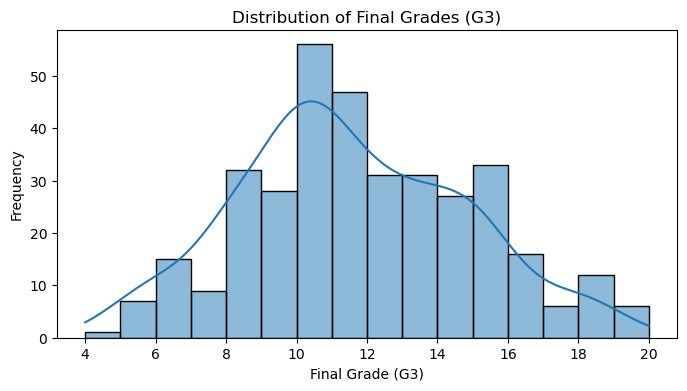

In [21]:
# I again visualize the distribution of G3 grades after I exclude the students who did not sit the exam
plt.figure(figsize=(8, 4))
sns.histplot(stu_data_who_sat_exam['G3'], kde=True, binwidth=1)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Split the dataset into X and y columns. G3 is my target/dependent variable as I already pointed out. 
X = stu_data_who_sat_exam.drop('G3', axis=1)  # Independent variables
y = stu_data_who_sat_exam['G3']  # Dependent variable G3 

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Show the rows and columns
print("X:", X.shape)
print("y:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X: (357, 41)
y: (357,)
X_train shape: (249, 41)
X_test shape: (108, 41)
y_train shape: (249,)
y_test shape: (108,)


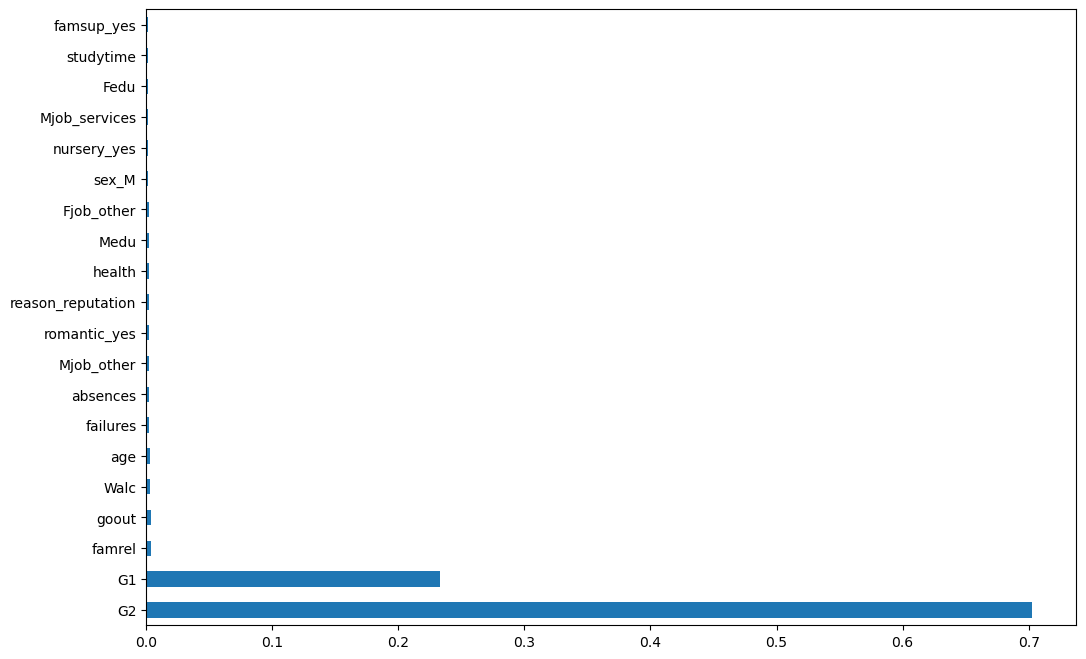

In [23]:
# Get the important features that influence the prediction of students' final grades G3 using ExtraTreesRegressor
sat_exam_selection = ExtraTreesRegressor()
sat_exam_selection.fit(X, y)

#print(sat_exam_selection.feature_importances_)

plt.figure(figsize = (12,8))
sat_exam_feat_importances = pd.Series(sat_exam_selection.feature_importances_, index=X.columns)
sat_exam_feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [24]:
# Here I create a function to train and evaluate a model. 
# I will re-use this function to evaluate all the models I pick. 


def evaluate_model(model, X_train, y_train, X_test, y_test, X, y):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # predict the target variable G3 for the test dataset.
    
    # Calculate and print performance metrics
    print("Model Performance:")
    print("Mean Absolute Error    : ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error     : ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-squared              : ", r2_score(y_test, y_pred))
    print("\n")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Cross-validation R2 scores  : ", cv_scores)
    print("Mean CV R2                  : ", cv_scores.mean())
    print("Standard Deviation in CV R2 : ", cv_scores.std())
    
    
    #The function returns the predicted values for the test dataset, which I can use for comparison with actual values
    return y_pred


In [25]:
# I also need a function to create a visual comparison between actual and predicted values from the model I have trained. 
#  I will use a scatter plot to show this

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    # This line adds a diagonal line to the plot, which represents the line of perfect prediction. If every predicted value was exactly equal to the actual value, all points would lie on this line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.show()

In [26]:
# Take the actual and predicted values as inputs and display a residual plot. 
# The residuals are calculated as the difference between the actual and the predicted values.

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
    plt.title(f'Residual Plot - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.show()

In [27]:
# Here I train & evaluate the Linear Regression model lr_sat_exam
lr_sat_exam = LinearRegression()
y_pred_lr = evaluate_model(lr_sat_exam, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.7201225256673967
Mean Squared Error     :  0.8840190605458739
Root Mean Squared Error:  0.9402228781229873
R-squared              :  0.912569543462496


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294


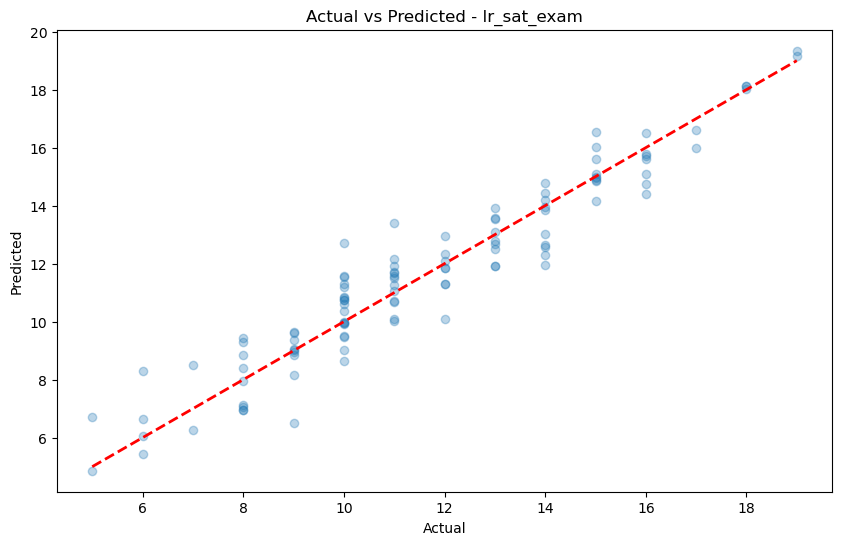

In [28]:
# Then I call the function to plot Actual v Predicted to get the visual comparison between actual and predictedvalues
plot_actual_vs_predicted(y_test, y_pred_lr, 'lr_sat_exam')

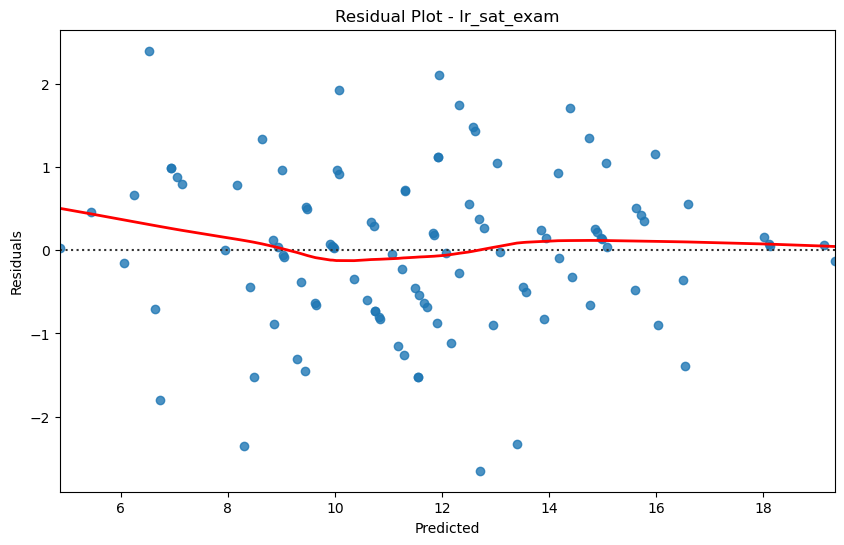

In [29]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_lr, 'lr_sat_exam')

In [ ]:
# Linear Regression model

Split 20%

Model Performance:
Mean Absolute Error    :  0.6748214503583269
Mean Squared Error     :  0.8093960199604425
Root Mean Squared Error:  0.8996643929601985
R-squared              :  0.9159860447415067


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294

Split 25%

Model Performance:
Mean Absolute Error    :  0.719230638279496
Mean Squared Error     :  0.8832102513840957
Root Mean Squared Error:  0.93979266404037
R-squared              :  0.9084744506907121


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294

Split 30%

Model Performance:
Mean Absolute Error    :  0.7201225256673967
Mean Squared Error     :  0.8840190605458739
Root Mean Squared Error:  0.9402228781229873
R-squared              :  0.912569543462496


Cross-validation R2 scores  :  [0.92048806 0.9338324  0.91119051 0.93778319 0.91819327]
Mean CV R2                  :  0.9242974869118985
Standard Deviation in CV R2 :  0.00996338117593294

In [31]:
# Training & evaluating the SVM model
svm_model = svm.SVR(kernel = "linear")
y_pred_svm = evaluate_model(svm_model, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.7425673477768883
Mean Squared Error     :  0.9192415178144336
Root Mean Squared Error:  0.9587708369649307
R-squared              :  0.9090860037326384


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418


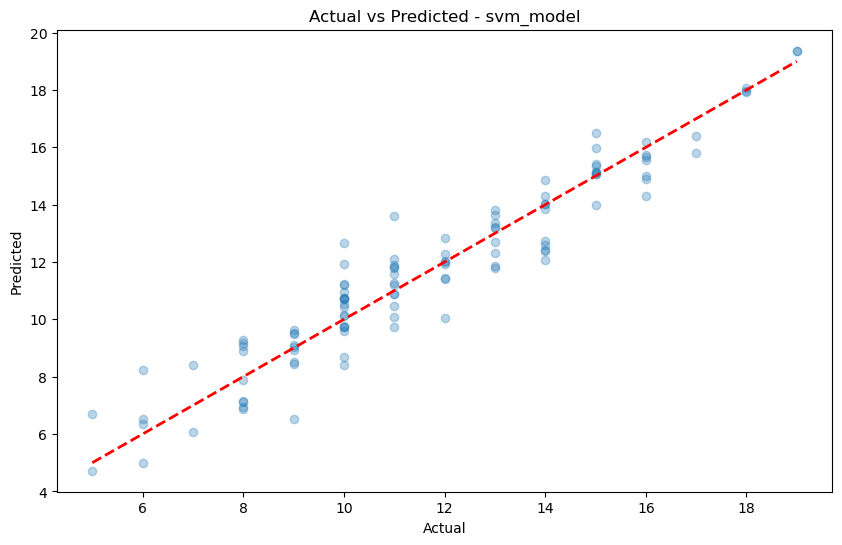

In [32]:
# Call the function to plot Actual v Predicted for svm_model
plot_actual_vs_predicted(y_test, y_pred_svm, 'svm_model')

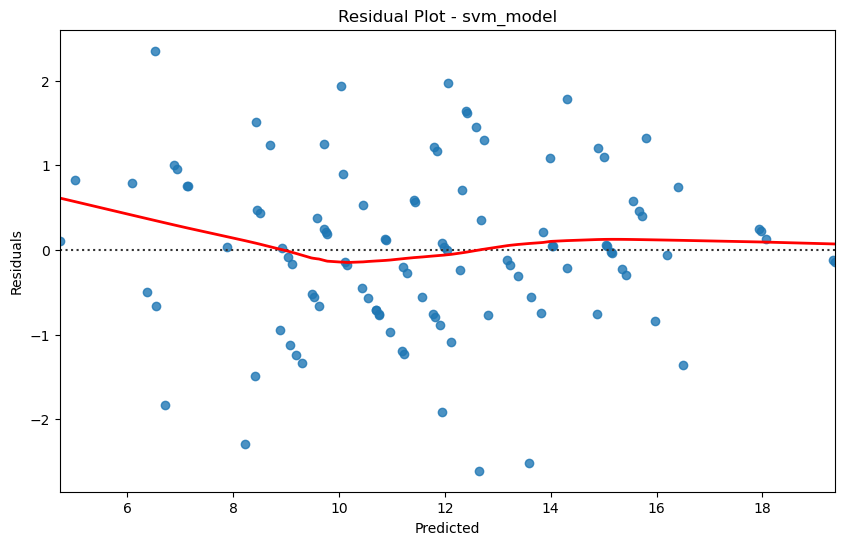

In [33]:
# Call the function to plot the residuals between Actual v Predicted for svm_model
plot_residuals(y_test, y_pred_svm, 'svm_model')

In [ ]:
# SVM model

Split 20%

Model Performance:
Mean Absolute Error    :  0.6789254583685616
Mean Squared Error     :  0.7957958165919297
Root Mean Squared Error:  0.8920738851641884
R-squared              :  0.9173977231401285


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418
    
Split 25%

Model Performance:
Mean Absolute Error    :  0.700780294415482
Mean Squared Error     :  0.8386780554950743
Root Mean Squared Error:  0.9157936751774792
R-squared              :  0.9130892450551391


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418

Split 30%

Model Performance:
Mean Absolute Error    :  0.7425673477768883
Mean Squared Error     :  0.9192415178144336
Root Mean Squared Error:  0.9587708369649307
R-squared              :  0.9090860037326384


Cross-validation R2 scores  :  [0.91920965 0.93456898 0.91065012 0.92628461 0.91095953]
Mean CV R2                  :  0.9203345758737871
Standard Deviation in CV R2 :  0.009175694093100418

In [34]:
# Training & evaluating the Decision Tree model
dtr = DecisionTreeRegressor(criterion='squared_error', random_state=0)
y_pred_dtr = evaluate_model(dtr, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.7870370370370371
Mean Squared Error     :  1.0833333333333333
Root Mean Squared Error:  1.0408329997330663
R-squared              :  0.8928571428571428


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172


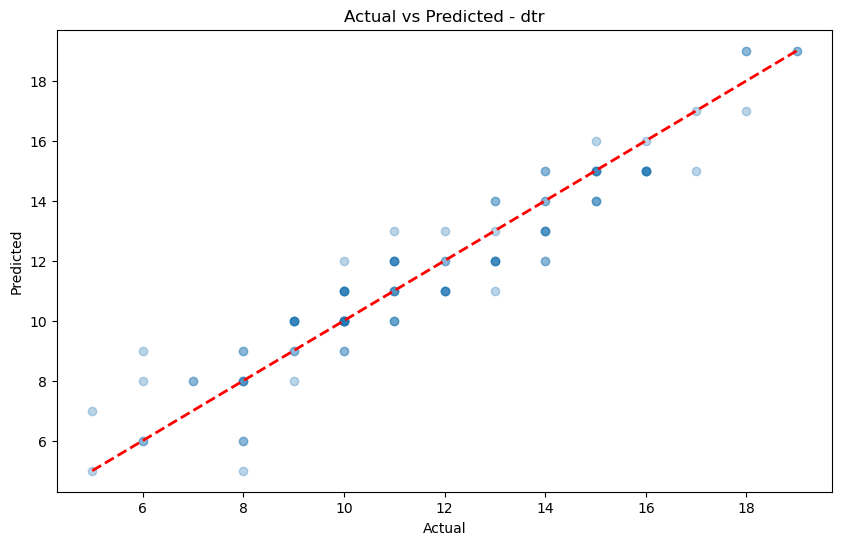

In [35]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_dtr, 'dtr')

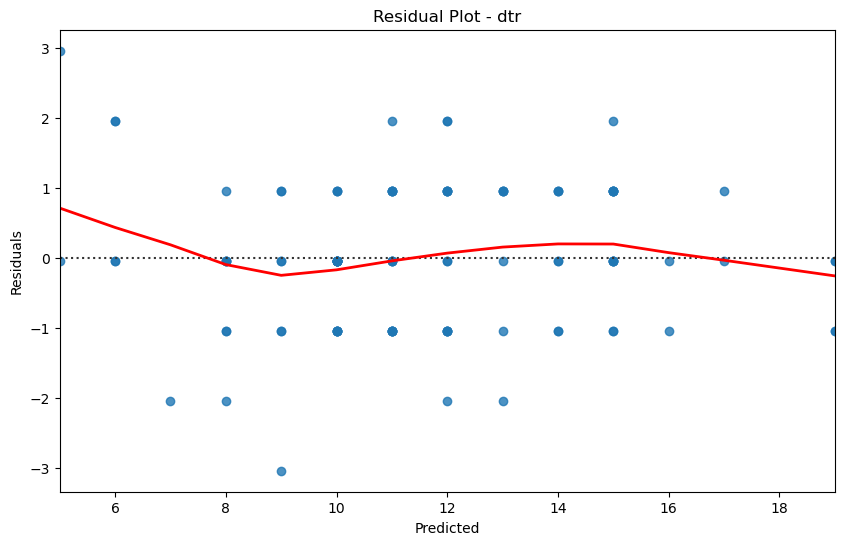

In [36]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_dtr, 'dtr')

In [ ]:
# Decision Tree model

Split 20%

Model Performance:
Mean Absolute Error    :  0.7361111111111112
Mean Squared Error     :  1.0138888888888888
Root Mean Squared Error:  1.0069204977995476
R-squared              :  0.8947600264301303


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172

Split 25%

Model Performance:
Mean Absolute Error    :  0.8111111111111111
Mean Squared Error     :  1.2555555555555555
Root Mean Squared Error:  1.1205157542647741
R-squared              :  0.8698889514354434


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172
    
Split 30%

Model Performance:
Mean Absolute Error    :  0.7870370370370371
Mean Squared Error     :  1.0833333333333333
Root Mean Squared Error:  1.0408329997330663
R-squared              :  0.8928571428571428


Cross-validation R2 scores  :  [0.86270158 0.88920617 0.8318575  0.84002832 0.85215178]
Mean CV R2                  :  0.8551890706814105
Standard Deviation in CV R2 :  0.019985176828434172

In [37]:
# Training & evaluating the random forest model
rfc = RandomForestRegressor ()
y_pred_rfc = evaluate_model(rfc, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.6166666666666666
Mean Squared Error     :  0.6873796296296298
Root Mean Squared Error:  0.8290836083469687
R-squared              :  0.9320173992673992


Cross-validation R2 scores  :  [0.90936825 0.94503438 0.90071375 0.92923036 0.91478439]
Mean CV R2                  :  0.9198262270331391
Standard Deviation in CV R2 :  0.015645860583018645


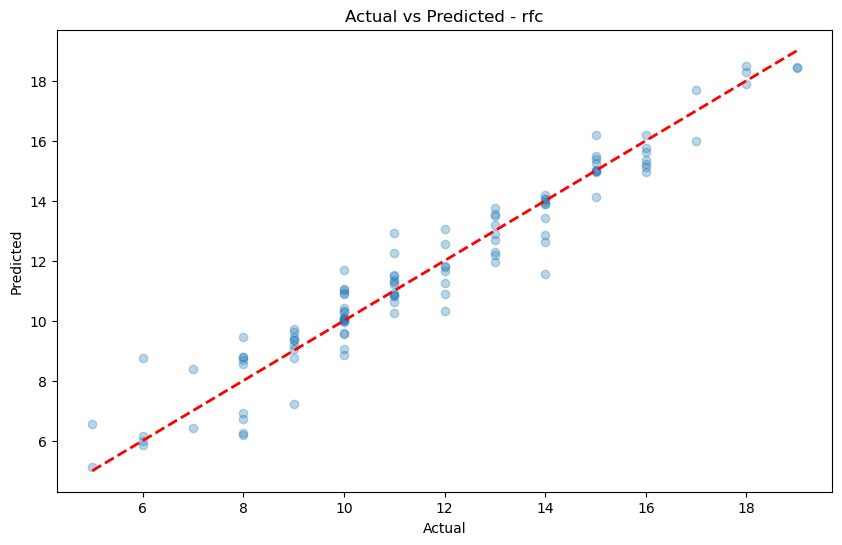

In [38]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_rfc, 'rfc')

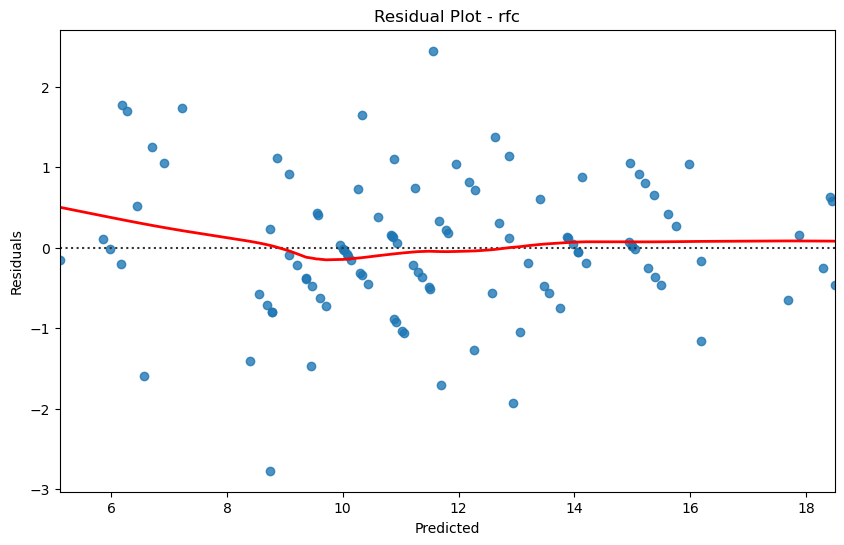

In [39]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_rfc, 'rfc')

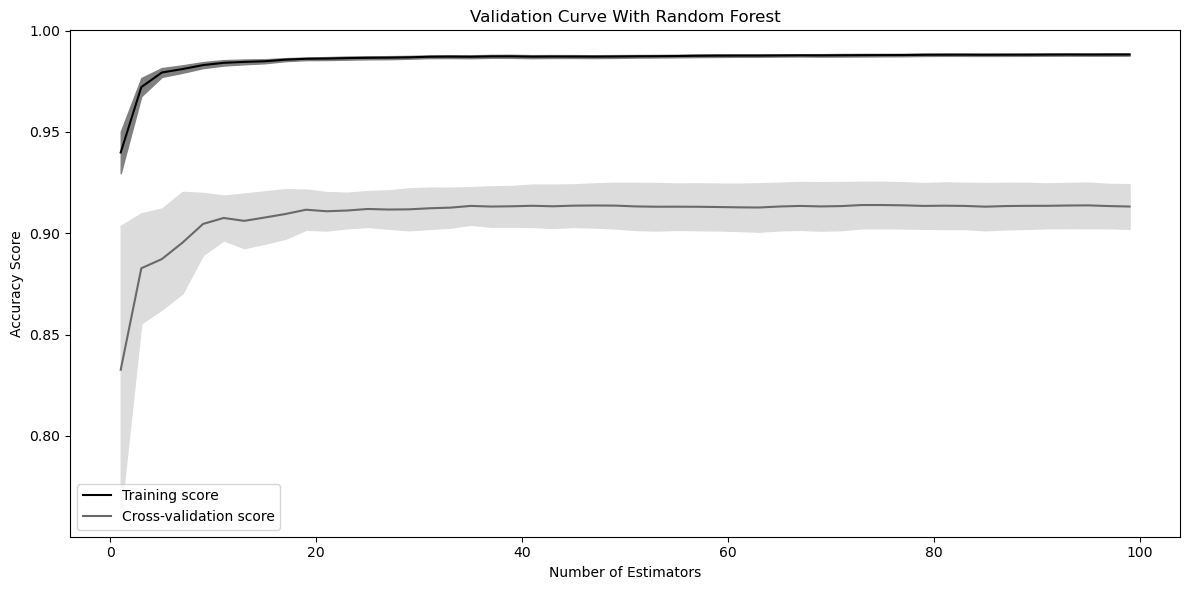

In [40]:
# In this block of code I determin the optimal number of trees (n_estimators) in a RandomForestRegressor model by plotting a validation curve. 


# Prepare the range of 'n_estimators' to test
param_range = np.arange(1, 100, 2)

# Calculate the scores across the range of 'n_estimators'
train_scores, test_scores = validation_curve(
    RandomForestRegressor(random_state=42),
    X_train, y_train,
    param_name='n_estimators',
    param_range=param_range,
    cv=5, scoring='r2'
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(12, 6))

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot the std deviation as a shaded area around the mean
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


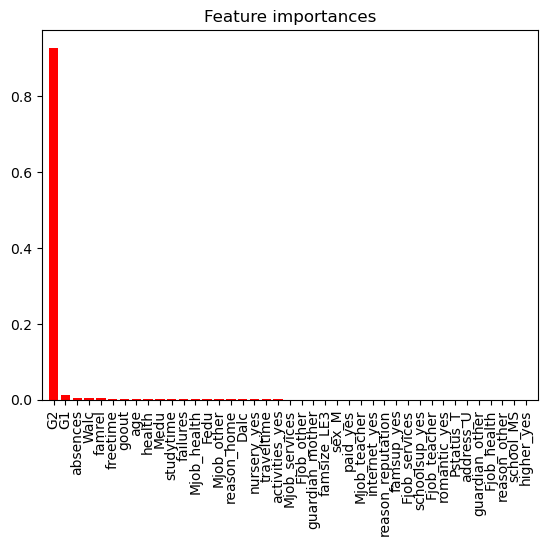

In [41]:
# Here I want to extract and visualize feature importance from the trained Random Forest model.
# These importances are based on how much each feature decreases the impurity of the split (the Gini impurity).

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# To plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [44]:
# Here I use GridSearchCV to perform hyperparameter tuning for a RandomForestRegressor. 
# It is a search over specified parameter values for an estimator, intended to find the combination of parameters that 
# will return the best model performance.


# Set up the refined parameter grid based on initial findings (Hyperparameter Tuning 1)
#param_grid = {
#    'n_estimators': [150, 200, 250], # The number of trees in the forest
#    'max_features': ['sqrt'],  # Suppose 'sqrt' was the best in the initial search
#    'max_depth': [20, 30, 40],  # Narrowing down based on initial results
#    'min_samples_split': [2, 3], # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2]  # The minimum number of samples required to be at a leaf node
#}


# Set up the refined parameter grid based on initial findings (Hyperparameter Tuning 2)
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],  # Wider range
    'max_features': ['sqrt', 'log2', None],     # Include more options
    'max_depth': [10, 20, 30, 40, None],        # Wider range and None for unlimited depth
    'min_samples_split': [2, 4, 6],             # Additional values
    'min_samples_leaf': [1, 2, 4]               # Additional values
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score achieved: ", grid_search.best_score_)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters found:  {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}
Best R² score achieved:  0.9193343766768729


In [45]:
# Random Forest Model with the best hyperparameters from GridSearchCV
rf_final = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_split=grid_search.best_params_['min_samples_split'],
                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                 max_features=grid_search.best_params_['max_features'],
                                 random_state=42)

y_pred_final = evaluate_model(rf_final, X_train, y_train, X_test, y_test, X, y)


Model Performance:
Mean Absolute Error    :  0.6222300251415854
Mean Squared Error     :  0.707638071335774
Root Mean Squared Error:  0.841212262948998
R-squared              :  0.9300138171206377


Cross-validation R2 scores  :  [0.91172843 0.93816436 0.89742658 0.93259759 0.92433337]
Mean CV R2                  :  0.9208500631435068
Standard Deviation in CV R2 :  0.014709088765426785


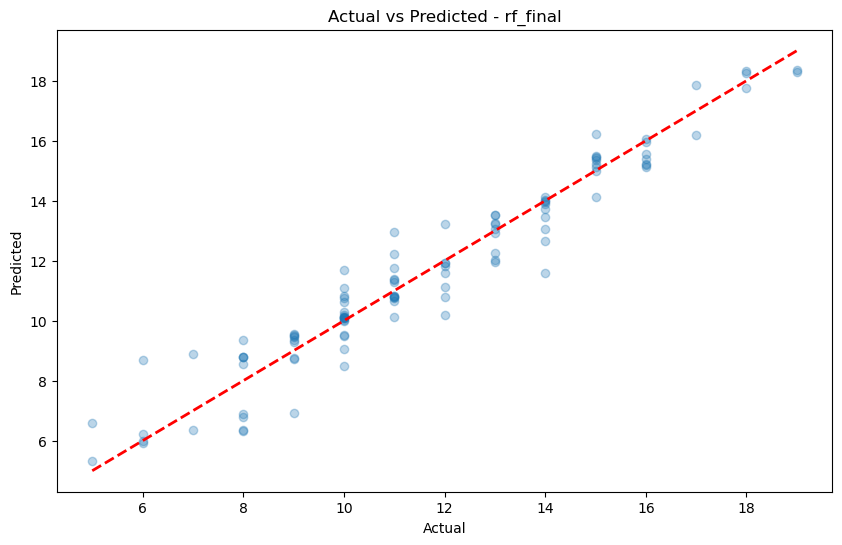

In [46]:
# Call the function to plot Actual v Predicted
plot_actual_vs_predicted(y_test, y_pred_final, 'rf_final')

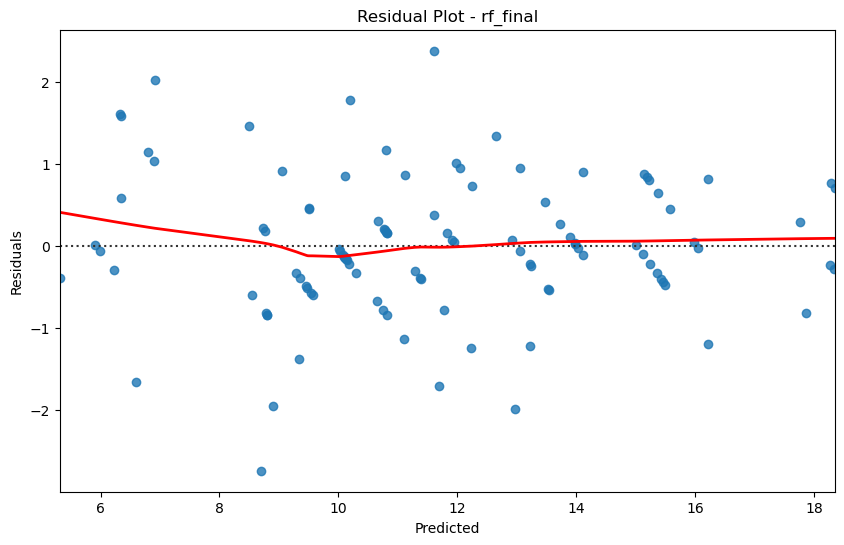

In [47]:
# Call the function to plot the residuals between Actual v Predicted
plot_residuals(y_test, y_pred_final, 'rf_final')

In [ ]:
# random forest model

20%

Model Performance:
Mean Absolute Error    :  0.5937499999999999
Mean Squared Error     :  0.6787458333333333
Root Mean Squared Error:  0.8238603239222856
R-squared              :  0.9295473159401718


Cross-validation R2 scores  :  [0.91590507 0.94492256 0.90182174 0.92584185 0.91491269]
Mean CV R2                  :  0.9206807837867256
Standard Deviation in CV R2 :  0.014325098012203951

25%

Model Performance:
Mean Absolute Error    :  0.6338888888888888
Mean Squared Error     :  0.7086699999999999
Root Mean Squared Error:  0.8418253975736298
R-squared              :  0.9265617547720179


Cross-validation R2 scores  :  [0.91449552 0.94026065 0.89941832 0.93485161 0.91920144]
Mean CV R2                  :  0.92164550896984
Standard Deviation in CV R2 :  0.0146428704379742

30%

Model Performance:
Mean Absolute Error    :  0.6181481481481482
Mean Squared Error     :  0.6913814814814816
Root Mean Squared Error:  0.83149352461789
R-squared              :  0.9316216117216117


Cross-validation R2 scores  :  [0.9132358  0.9433205  0.90010054 0.92925276 0.91450299]
Mean CV R2                  :  0.9200825189887322
Standard Deviation in CV R2 :  0.014841732429830279
    
    
30% - Hyperparameter Tuning 1    

Model Performance:
Mean Absolute Error    :  0.9770376249265138
Mean Squared Error     :  1.6710302001535564
Root Mean Squared Error:  1.2926833332852854
R-squared              :  0.83473327690789


Cross-validation R2 scores  :  [0.80674425 0.81211974 0.80560448 0.81309717 0.83063157]
Mean CV R2                  :  0.8136394423829969
Standard Deviation in CV R2 :  0.00898265100263371
    
    
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
Best R² score achieved:  0.8208661227281853    
    
    
    
30% - Hyperparameter Tuning 2:

Model Performance:
Mean Absolute Error    :  0.6215863004474165
Mean Squared Error     :  0.7043764416906706
Root Mean Squared Error:  0.8392713754743877
R-squared              :  0.9303363958767469


Cross-validation R2 scores  :  [0.91148225 0.94027011 0.89887866 0.93087874 0.9238684 ]
Mean CV R2                  :  0.9210756323791923
Standard Deviation in CV R2 :  0.014540063497180953
    
    
Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best parameters found:  {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 150}
Best R² score achieved:  0.9191151131596793